In [1]:
import glob

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

In [2]:
tf.__version__

'1.15.5'

In [124]:
mmfiles = sorted(glob.glob('/home/cjw/Code/DeepLearning/classifier/Data/male/*.mm'))

def read_mm(mfile):
    hm=np.memmap(mfile, dtype=np.int32, shape=(4,))
    shape = tuple(hm)
    print(shape)
    del hm

    mm = np.memmap(mfile, dtype=np.float32, offset=128, shape=shape)
    mm.shape
    #del mm
    #amm = mm[:,:,:,[2, 0, 4, 0, 1]]
    amm = mm[:,:,:, [0,2,4]]
    del mm
    return amm

In [98]:
tf.reset_default_graph()
#dud = tf.get_variable('v1', shape=[2])
sess = tf.Session()


In [99]:
def normalize(x):
    xm = x.mean(axis=(1,2), keepdims=True)
    sm = x.std(axis=(1,2), keepdims=True)
    xn  = (x - xm)/sm
    return xn

(4773, 64, 64, 3)


(array([-24.728376 ,  -1.6595844,  -1.6212324], dtype=float32),
 array([31.560041, 43.219425, 22.417572], dtype=float32),
 array([-8.6545418e-07, -2.0546072e-07, -2.0219151e-08], dtype=float32))

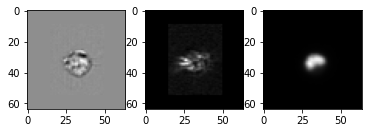

In [100]:
npfiles = sorted(glob.glob('Data/Male/npfiles/*.npy'))
   
data = np.load(npfiles[2])
data = normalize(data)
plt.figure(figsize=(6,2))
plt.subplot(1,3,1)
plt.imshow(data[2567,:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(data[2567,:,:,1], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(data[2567,:,:,2], cmap='gray')

print(data.shape)
data.min(axis=(0,1,2)), data.max(axis=(0,1,2)), data.mean(axis=(0,1,2))

In [108]:

#checkpoint = 'Checkpoints/test/cp-2021-05-04-16-07/checkpoint-24999'
tf.reset_default_graph()
sess = tf.Session()
checkpoint = '/home/cjw/Code/DeepLearning/classifier/Checkpoints/Snail_Redo_for_metrics_7_classes/best-2019-08-16-10-46/best-checkpoint-21300'
cpmeta = checkpoint + '.meta'
saver = tf.train.import_meta_graph(cpmeta)
saver.restore(sess, checkpoint)

'metric_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /home/cjw/Code/DeepLearning/classifier/Checkpoints/Snail_Redo_for_metrics_7_classes/best-2019-08-16-10-46/best-checkpoint-21300


In [109]:
a = sess.graph.get_tensor_by_name('dense_1/BiasAdd:0')
b = sess.graph.get_tensor_by_name('LeakyRelu_13:0') #'dense_1/BiasAdd:0')
sm = sess.graph.get_tensor_by_name('Softmax:0')

softmax = sess.graph.get_tensor_by_name('Softmax:0')
batch = sess.graph.get_tensor_by_name('Placeholder:0')

In [110]:
a, b, sm, softmax

(<tf.Tensor 'dense_1/BiasAdd:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'LeakyRelu_13:0' shape=(?, 128) dtype=float32>,
 <tf.Tensor 'Softmax:0' shape=(?, 7) dtype=float32>,
 <tf.Tensor 'Softmax:0' shape=(?, 7) dtype=float32>)

In [111]:
#data.max(axis=(0,1,2)), data.min(axis=(0,1,2))

In [112]:
#cdf.groupby('ClusterID').agg('count')

In [125]:
df_list = list()
images = sess.graph.get_tensor_by_name('Placeholder:0')
for f in mmfiles:
    s = slice(16, 48)
    _data = read_mm(f)
    _data = normalize(_data)
    _data = _data[:,s,s,:]
    
    #_data = (np.load(f))[:, s, s, :]
    print(f, _data.shape)
    _probs = sess.run(softmax, feed_dict={images:_data})
    _c = _probs.argmax(axis=-1)
    _df = pd.DataFrame({'probability':_probs.max(axis=-1),
                       'class':_c, 'dataset':f})
    df_list.append(_df)

xdf = pd.concat(df_list, axis=0)

(6832, 64, 64, 5)
/home/cjw/Code/DeepLearning/classifier/Data/male/male_Snail_Male_R1.mm (6832, 32, 32, 3)
(7225, 64, 64, 5)
/home/cjw/Code/DeepLearning/classifier/Data/male/male_Snail_Male_R2.mm (7225, 32, 32, 3)
(4773, 64, 64, 5)
/home/cjw/Code/DeepLearning/classifier/Data/male/male_Snail_Male_R3.mm (4773, 32, 32, 3)
(5917, 64, 64, 5)
/home/cjw/Code/DeepLearning/classifier/Data/male/male_Snail_Male_R4.mm (5917, 32, 32, 3)
(7755, 64, 64, 5)
/home/cjw/Code/DeepLearning/classifier/Data/male/male_Snail_Male_R5.mm (7755, 32, 32, 3)


In [81]:
df_list = list()
images = sess.graph.get_tensor_by_name('Placeholder:0')
for f in npfiles:
    s = slice(16, 48)
    _data = normalize(np.load(f))[:, s, s, :]
    #_data = (np.load(f))[:, s, s, :]
    print(f, _data.shape)
    _probs = sess.run(softmax, feed_dict={images:_data})
    _c = _probs.argmax(axis=-1)
    _df = pd.DataFrame({'probability':_probs.max(axis=-1),
                       'class':_c, 'dataset':f})
    df_list.append(_df)

xdf = pd.concat(df_list, axis=0)

Data/Male/npfiles/Tifs_Snail_Male_R1.npy (6832, 32, 32, 3)
Data/Male/npfiles/Tifs_Snail_Male_R2.npy (7225, 32, 32, 3)
Data/Male/npfiles/Tifs_Snail_Male_R3.npy (4773, 32, 32, 3)
Data/Male/npfiles/Tifs_Snail_Male_R4.npy (5917, 32, 32, 3)
Data/Male/npfiles/Tifs_Snail_Male_R5.npy (7755, 32, 32, 3)


In [126]:
xdf

,probability,class,dataset
0,0.395596,3,/home/cjw/Code/DeepLearning/classifier/Data/ma...
1,0.909171,6,/home/cjw/Code/DeepLearning/classifier/Data/ma...
2,0.998071,0,/home/cjw/Code/DeepLearning/classifier/Data/ma...
3,0.710277,6,/home/cjw/Code/DeepLearning/classifier/Data/ma...
4,0.990822,4,/home/cjw/Code/DeepLearning/classifier/Data/ma...
...,...,...,...
7750,0.992334,0,/home/cjw/Code/DeepLearning/classifier/Data/ma...
7751,0.598157,0,/home/cjw/Code/DeepLearning/classifier/Data/ma...
7752,0.999914,0,/home/cjw/Code/DeepLearning/classifier/Data/ma...
7753,0.849667,1,/home/cjw/Code/DeepLearning/classifier/Data/ma...


In [ ]:
pv = xdf.groupby(['dataset','class']).agg('count').reset_index()
sns.barplot(data=pv, x='class', y='probability')
sns.stripplot(data=pv, x='class', y='probability', color='#444444')
plt.yscale('log')

In [ ]:
pv = xdf.groupby(['dataset','class']).agg('count').reset_index()
sns.boxplot(data=pv, x='class', y='probability')
sns.stripplot(data=pv, x='class', y='probability', color='#444444')
#plt.yscale('log')

In [76]:
pv

,dataset,class,probability
0,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,0,2032
1,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,1,165
2,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,2,218
3,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,3,1545
4,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,4,714
5,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,5,449
6,Data/Male/npfiles/Tifs_Snail_Male_R1.npy,6,1709
7,Data/Male/npfiles/Tifs_Snail_Male_R2.npy,0,2540
8,Data/Male/npfiles/Tifs_Snail_Male_R2.npy,1,168
9,Data/Male/npfiles/Tifs_Snail_Male_R2.npy,2,156
